In [ ]:
from src.thdm_param_scan import calculate_random_sampling_v2, check_vacuum_conditions
import pandas as pd

higgs_mass = 125.35  # Higgs mass in GeV
vev = 246.22  # Vacuum expectation value in GeV

mass_range = (400, 20 * higgs_mass)

epsilon_range = (-0.001, 0.001)

delta_range = (-0.25, 0.25)

n_points = int(1e10)

n_steps = int(1e3)

results_with_conditions = []

for i in range(n_steps):
    results_with_conditions.append(
        check_vacuum_conditions(
            calculate_random_sampling_v2(mass_range, epsilon_range, delta_range, n_samples=int(n_points / n_steps)),
            verbose=False,
        ).query("Theoretical_constraints_satisfied")
    )
results_with_conditions = pd.concat(results_with_conditions, ignore_index=True)

In [ ]:
results_with_conditions.shape

(5808, 18)

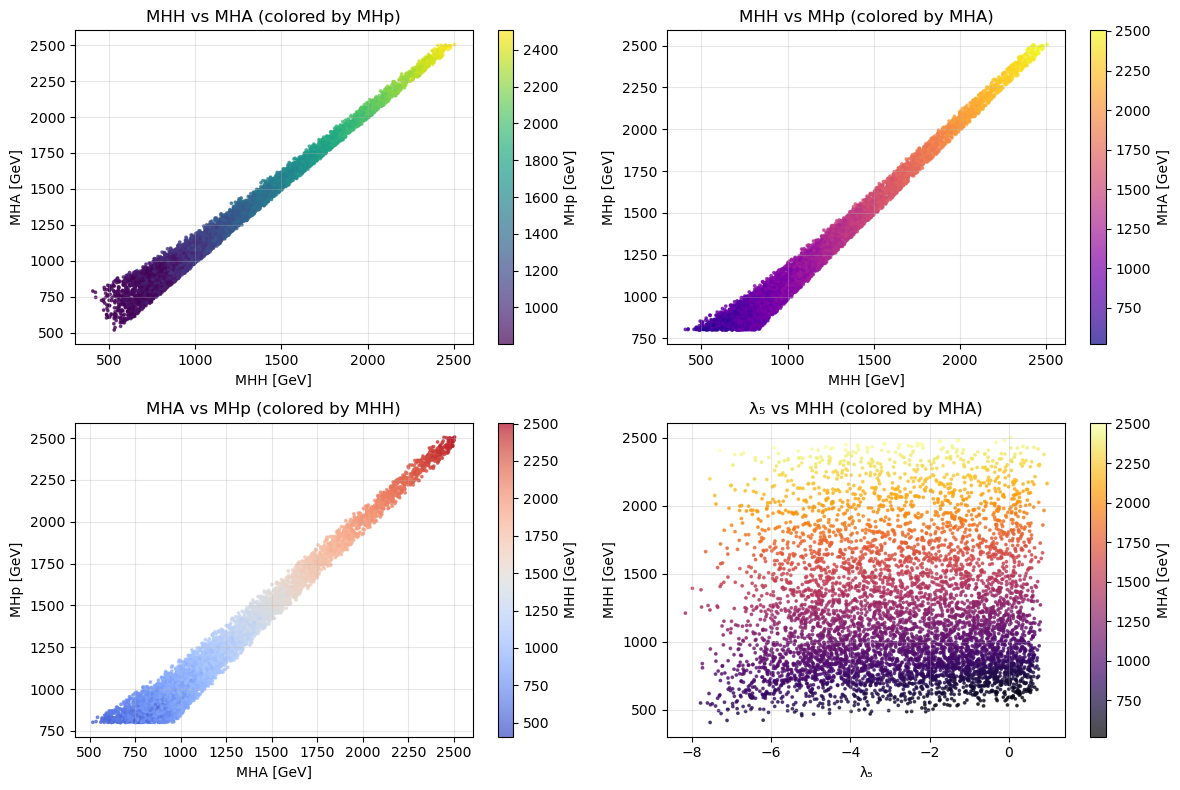

In [ ]:
import matplotlib.pyplot as plt

# Create a more detailed analysis with multiple plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: MHH vs MHA colored by MHp (same as before but enhanced)
scatter1 = axes[0, 0].scatter(
    results_with_conditions["MHH"],
    results_with_conditions["MHA"],
    c=results_with_conditions["MHp"],
    alpha=0.7,
    s=3,
    cmap="viridis",
)
axes[0, 0].set_xlabel("MHH [GeV]")
axes[0, 0].set_ylabel("MHA [GeV]")
axes[0, 0].set_title("MHH vs MHA (colored by MHp)")
axes[0, 0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_label("MHp [GeV]")

# Plot 2: MHH vs MHp colored by MHA
scatter2 = axes[0, 1].scatter(
    results_with_conditions["MHH"],
    results_with_conditions["MHp"],
    c=results_with_conditions["MHA"],
    alpha=0.7,
    s=3,
    cmap="plasma",
)
axes[0, 1].set_xlabel("MHH [GeV]")
axes[0, 1].set_ylabel("MHp [GeV]")
axes[0, 1].set_title("MHH vs MHp (colored by MHA)")
axes[0, 1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
cbar2.set_label("MHA [GeV]")

# Plot 3: MHA vs MHp colored by MHH
scatter3 = axes[1, 0].scatter(
    results_with_conditions["MHA"],
    results_with_conditions["MHp"],
    c=results_with_conditions["MHH"],
    alpha=0.7,
    s=3,
    cmap="coolwarm",
)
axes[1, 0].set_xlabel("MHA [GeV]")
axes[1, 0].set_ylabel("MHp [GeV]")
axes[1, 0].set_title("MHA vs MHp (colored by MHH)")
axes[1, 0].grid(True, alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_label("MHH [GeV]")

# Plot 4: lam5 vs MHH colored by MHA
scatter4 = axes[1, 1].scatter(
    results_with_conditions["lam5"],
    results_with_conditions["MHH"],
    c=results_with_conditions["MHA"],
    alpha=0.7,
    s=3,
    cmap="inferno",
)
axes[1, 1].set_xlabel("λ₅")
axes[1, 1].set_ylabel("MHH [GeV]")
axes[1, 1].set_title("λ₅ vs MHH (colored by MHA)")
axes[1, 1].grid(True, alpha=0.3)
cbar4 = plt.colorbar(scatter4, ax=axes[1, 1])
cbar4.set_label("MHA [GeV]")

plt.tight_layout()
plt.show()

# # save the figure
# fig.savefig(
#     f"/home/cfrc2694/github/Pheno_Phd_Thesis/Slides/2025_THDM_II/{f_query}_THDM_param_scan_analysis.png",
#     dpi=300,
#     bbox_inches="tight",
# )

# Close the figure to avoid displaying it and free memory
# plt.close(fig)

# print("Figure saved successfully in:")
# print(f"/home/cfrc2694/github/Pheno_Phd_Thesis/Slides/2025_THDM_II/{f_query}_THDM_param_scan_analysis.png")

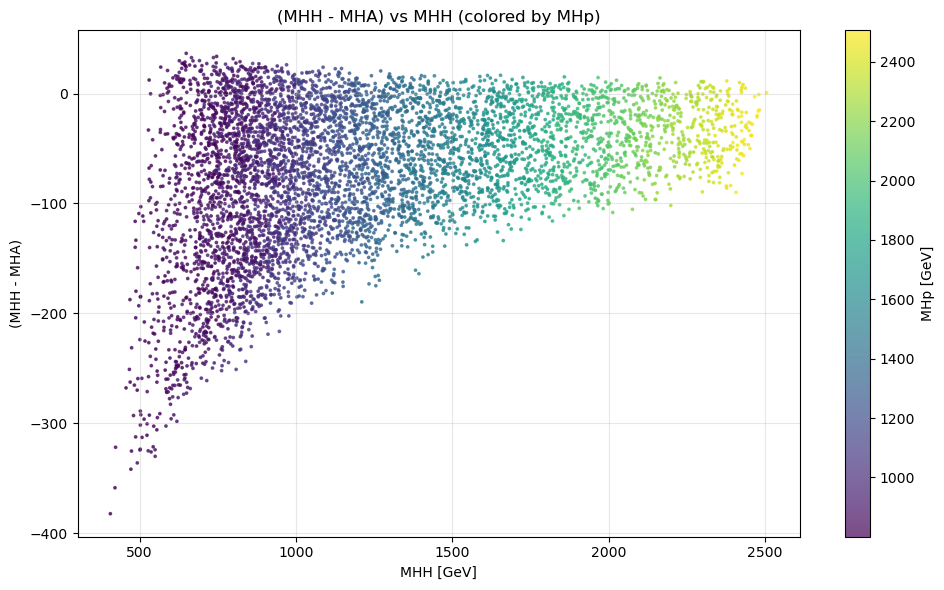

In [ ]:
# Create a new plot: (MHH - MHA) vs MHH colored by MHp
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Calculate (MHH - MHA)/vev
y_values = results_with_conditions["MHH"] - results_with_conditions["MHA"]

# Create the scatter plot
scatter = ax.scatter(
    results_with_conditions["MHH"],
    y_values,
    c=results_with_conditions["MHp"],
    alpha=0.7,
    s=3,
    cmap="viridis",
)

ax.set_xlabel("MHH [GeV]")
ax.set_ylabel("(MHH - MHA)")
ax.set_title("(MHH - MHA) vs MHH (colored by MHp)")
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("MHp [GeV]")

plt.tight_layout()
plt.show()

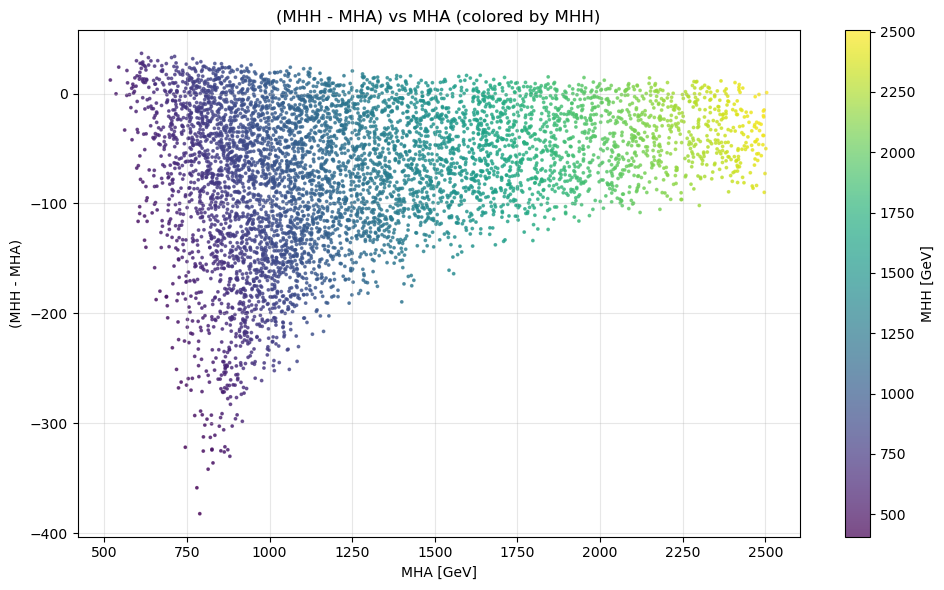

In [ ]:
# Create a new plot: (MHH - MHA)/vev vs MHp colored by MHH
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Calculate (MHH - MHA)/vev
y_values = results_with_conditions["MHH"] - results_with_conditions["MHA"]

# Create the scatter plot
scatter = ax.scatter(
    results_with_conditions["MHA"],
    y_values,
    c=results_with_conditions["MHH"],
    alpha=0.7,
    s=3,
    cmap="viridis",
)

ax.set_xlabel("MHA [GeV]")
ax.set_ylabel("(MHH - MHA)")
ax.set_title("(MHH - MHA) vs MHA (colored by MHH)")
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("MHH [GeV]")

plt.tight_layout()
plt.show()